In [60]:
#Telecharger la structure de bande du materiau mp-1115 (PtSe2)
from pymatgen.ext.matproj import MPRester

with MPRester("NLKe1dAg7yznVObH") as m:
    # Create a structure for material id mp-1115 (PtSe2)
    bstructure = m.get_bandstructure_by_material_id("mp-1115")

# La bande interdite

In [61]:
## bande interdite:
gap= bstructure.get_band_gap()
print(gap)

{'direct': False, 'energy': 0.8273999999999999, 'transition': '(0.087,0.087,0.000)-(0.261,0.261,0.000)'}


La bande interdite de notre matériau a une énergie de 0.8274 eV.

De plus, on voit qu'elle est indirecte. Ceci signifie que le maximum de bande de valence (VBM) et le minimum de bande de conduction (CBM) n'ont pas le même vecteur d'onde.

Le kpoint correspondant au VBM a comme coordonnées fractionnaires (0.087,0.087,0.000),
tandis que celles du CBM sont (0.261,0.261,0.000).

# La dernière bande de valence

In [62]:
vbm = bstructure.get_vbm()
print(vbm)

{'band_index': defaultdict(<class 'list'>, {<Spin.up: 1>: [10]}), 'kpoint_index': [51], 'kpoint': <pymatgen.electronic_structure.bandstructure.Kpoint object at 0x7f4768807668>, 'energy': 3.0846, 'projections': {}}


Il s'agit de la bande d'indice 10.
Le VBM s'y trouve à l'indice de kpoint (51) et a une énergie de 3.0846eV.

# La première bande de conduction

In [63]:
cbm = bstructure.get_cbm()
print(cbm)

{'band_index': defaultdict(<class 'list'>, {<Spin.up: 1>: [11]}), 'kpoint_index': [39], 'kpoint': <pymatgen.electronic_structure.bandstructure.Kpoint object at 0x7f47688073c8>, 'energy': 3.912, 'projections': {}}


Il s'agit de la bande d'indice 11.
Le CBM s'y trouve à l'indice de kpoint (39) et a une énergie de 3.912eV.

In [64]:
from pymatgen.electronic_structure import plotter
bsplot = plotter.BSPlotter(bstructure)
data = bsplot.bs_plot_data(zero_to_efermi=False)
distances = data.get('distances')
energy = data.get('energy')

# Dispersion
Pour trouver la direction dans laquelle une bande présente le plus (moins) de dispersion, il faut trouver la branche pour laquelle la pente sur le diffractogramme est la plus grande (faible). 

In [65]:
#On a 9 branches:
#\\Gamma-M: 0-20
#M-K 21-33
#K-\\Gamma 34-57
#\\Gamma-A 58-69
#A-L 70-90
#L-H 91-103
#H-A 104-127
#L-M 128-139
#K-H 140-151

import numpy as np
import matplotlib.pyplot as plt

#petite fonction pour calculer les pentes
def pente (x1, x2, y1, y2):
    return (y2-y1)/(x2-x1)

### Dans la dernière bande de valence

In [66]:
pentesV = np.zeros(9)
for i in range(9):
    #print("Pente de la "+str(i+1)+"e branche de la bande de valence:")
    a = pente (distances[i][0],distances[i][-1],energy[i].get('1')[10][0],energy[i].get('1')[10][-1])
    pentesV[i] = abs(a)
    #print(a)
print("La pente la plus faible, de valeur absolue " + str(min(pentesV)) +', se trouve dans la '
      + str(np.where(pentesV== np.min(pentesV))[0][0] +1)+ 'e branche.')
print("La dernière bande de valence présente donc le moins de dispersion dans la direction L-H.")
print("\nLa pente la plus forte, de valeur absolue " + str(max(pentesV)) +', se trouve dans la '
      + str(np.where(pentesV== np.max(pentesV))[0][0] +1) + 'e branche.')
print("La dernière bande de valence présente donc le plus de dispersion dans la direction \\\Gamma-M.")

La pente la plus faible, de valeur absolue 0.30617656471295474, se trouve dans la 6e branche.
La dernière bande de valence présente donc le moins de dispersion dans la direction L-H.

La pente la plus forte, de valeur absolue 2.159510430973818, se trouve dans la 1e branche.
La dernière bande de valence présente donc le plus de dispersion dans la direction \\Gamma-M.


### Dans la première bande de conduction

In [67]:
pentesC = np.zeros(9)
for i in range(9):
    #print("Pente de la "+str(i+1)+"e branche de la bande de conduction:")
    a = pente (distances[i][0],distances[i][-1],energy[i].get('1')[11][0],energy[i].get('1')[11][-1])
    pentesC[i] = abs(a)
    #print(a)
print("La pente la plus faible, de valeur absolue " + str(min(pentesC)) + ', se trouve dans la '
      + str(np.where(pentesC== np.min(pentesC))[0][0] +1)+ 'e branche.')
print("La première bande de conduction présente donc le moins de dispersion dans la direction \\\Gamma-A.")
print("\nLa pente la plus forte, de valeur absolue " + str(max(pentesC)) + ', se trouve dans la '
      + str(np.where(pentesC== np.max(pentesC))[0][0] +1)+ 'e branche.')
print("La première bande de conduction présente donc le plus de dispersion dans la direction K-H.")

La pente la plus faible, de valeur absolue 0.2858798838142661, se trouve dans la 4e branche.
La première bande de conduction présente donc le moins de dispersion dans la direction \\Gamma-A.

La pente la plus forte, de valeur absolue 1.4385522491389473, se trouve dans la 9e branche.
La première bande de conduction présente donc le plus de dispersion dans la direction K-H.


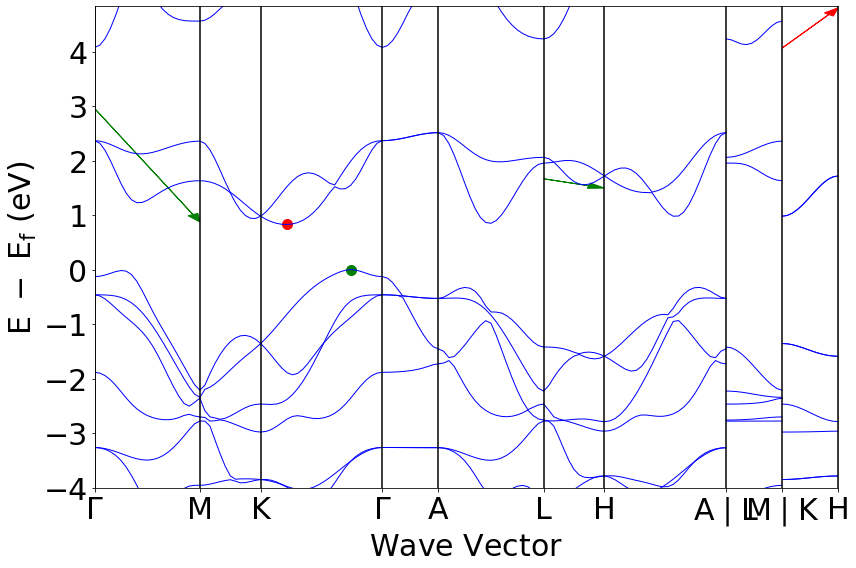

In [68]:
#Le diffractogramme, avec indication du VBM et CBM, ainsi que les flèches indiquant les dispersions
bsplot.get_plot(vbm_cbm_marker=True)

#min dispersion BV:
x1,x2,y1,y2=distances[5][0],distances[5][-1],energy[5].get('1')[10][0],energy[5].get('1')[10][-1]
plt.arrow(x1,y1, x2-x1,y2-y1, length_includes_head=True, head_width=0.1, color = 'g')
#max dispersion BV:
x1,x2,y1,y2=distances[0][0],distances[0][-1],energy[0].get('1')[10][0],energy[0].get('1')[10][-1]
plt.arrow(x1,y1, x2-x1,y2-y1, length_includes_head=True, head_width=0.1, color = 'g')

#min dispersion BC:
x1,x2,y1,y2=distances[3][0],distances[3][-1],energy[3].get('1')[11][0],energy[3].get('1')[11][-1]
plt.arrow(x1,y1, x2-x1,y2-y1, length_includes_head=True, head_width=0.1, color = 'r')
#max dispersion BC:
x1,x2,y1,y2=distances[8][0],distances[8][-1],energy[8].get('1')[11][0],energy[8].get('1')[11][-1]
plt.arrow(x1,y1, x2-x1,y2-y1, length_includes_head=True, head_width=0.1, color = 'r')


# Calcul de la masse effective
Par définition, la masse effective $m^*$ est telle que: $\frac{\partial^2 E}{\partial k^2} = \frac{\hbar^2}{m^*} $

En pratique, pour les états voisins d'un minimum ou d'un maximum de bande (comme c'est le cas pour le CBM et VBM), la relation E(**k**) peut être approximée par la relation quadratique suivante:

$E($**k**$) - E_0 =  \pm \frac{\hbar^2}{2m^*} (k_1^2+k_2^2+k_3^2)$,

avec $(k_1^2+k_2^2+k_3^2)$ la norme de **k** au carré, et $\hbar$ la constante de Planck réduite.

En considérant que $E = E$(**k**)$- E _0$ est l'énergie en minimum ou maximum de bande (en fonction du cas considéré), on a que:

$m^* = \frac{\hbar^2}{2E}(k_1^2+k_2^2+k_3^2)$


In [71]:
h_bar = 6.582119569 * 10**(-16) # en eV*s

#bande de conduction:
kc = cbm.get('kpoint').frac_coords
ec = cbm.get('energy')
k2c = kc[0] * kc[0] + kc[1] * kc[1] + kc[2] * kc[2]
m_effC = h_bar*h_bar /(2*ec)*k2c
print("La masse effective du minimum de la première bande de conduction est de " +str(m_effC) + " kg.")

#bande de valence
kv = vbm.get('kpoint').frac_coords
ev = vbm.get('energy')
k2v = kv[0] * kv[0] + kv[1] * kv[1] + kv[2]*kv[2]
m_effV = - h_bar*h_bar /(2*ev)*k2v
print("\nLa masse effective du maximum de la dernière bande de valence est de " + str(m_effV) + " kg.")


La masse effective du minimum de la première bande de conduction est de 7.536670580416287e-33 kg.

La masse effective du maximum de la dernière bande de valence est de -1.0620304829796176e-33 kg.
